###  Load & Profile Data

In [10]:
# Use pandas to load the dataset
import pandas as pd
df = pd.read_csv("../../data/benin-malanville.csv")

### Summary Statistics & Missing-Value Report 

In [11]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [12]:
# Generate summary stats
df.describe() 

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [13]:
# Generate summary stats
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

### Handle Missing Data & Outliers

In [14]:
# Drop/impute missing values (if >5% missing):
df.drop('Comments', axis=1, inplace=True)

In [15]:
# Detect outliers (Z-score method):
from scipy import stats
z_scores = stats.zscore(df[['GHI', 'DNI', 'DHI', 'WS', 'WSgust']])
outliers = (abs(z_scores) > 3).any(axis=1)
df_clean = df[~outliers]

In [16]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


### Exploratory Data Analysis (EDA)


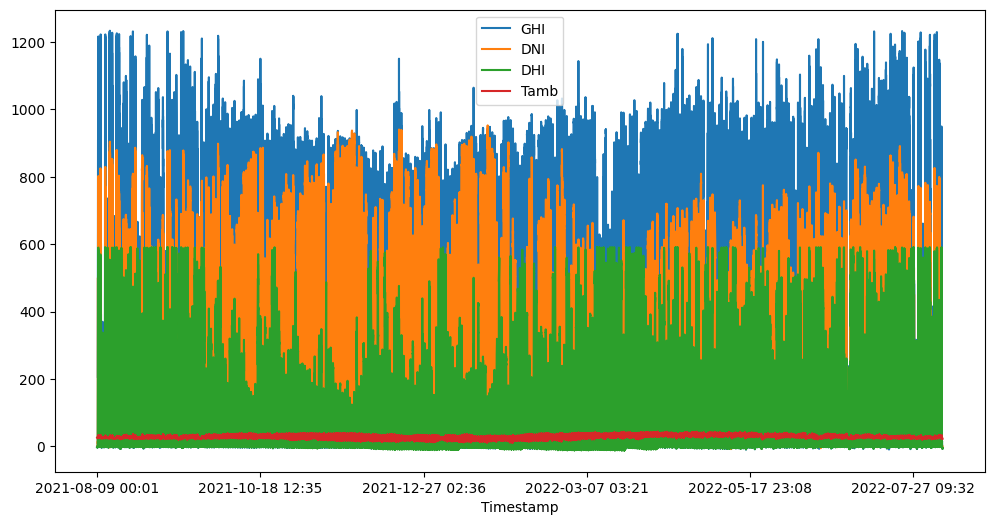

In [21]:
# Time Series Analysis (GHI, DNI, DHI vs. Time):
import matplotlib.pyplot as plt
df_clean.plot(x='Timestamp', y=['GHI', 'DNI', 'DHI', 'Tamb'],figsize=(12, 6))
plt.show()


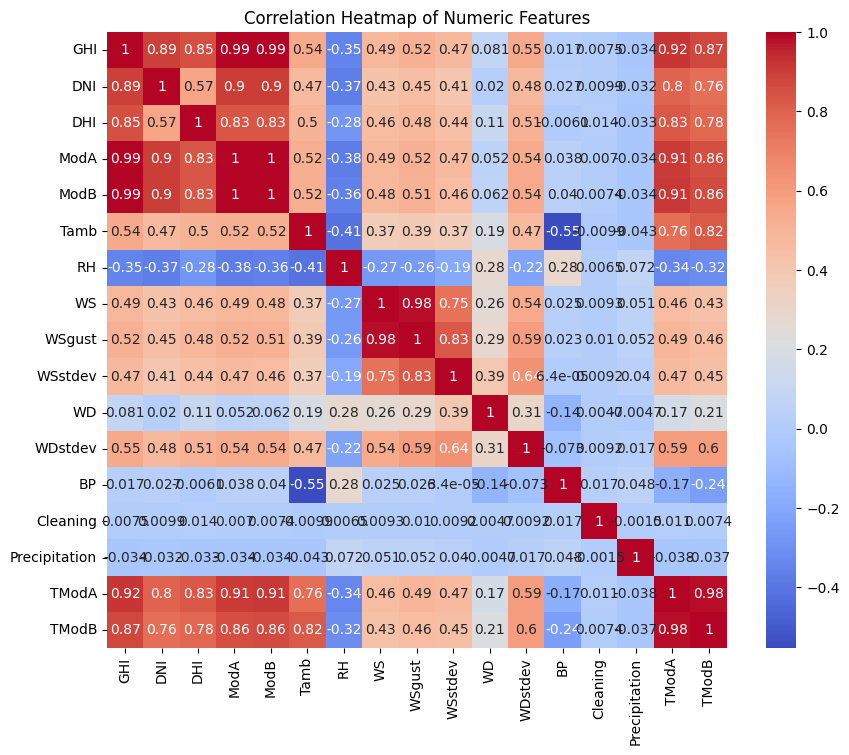

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df_clean.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


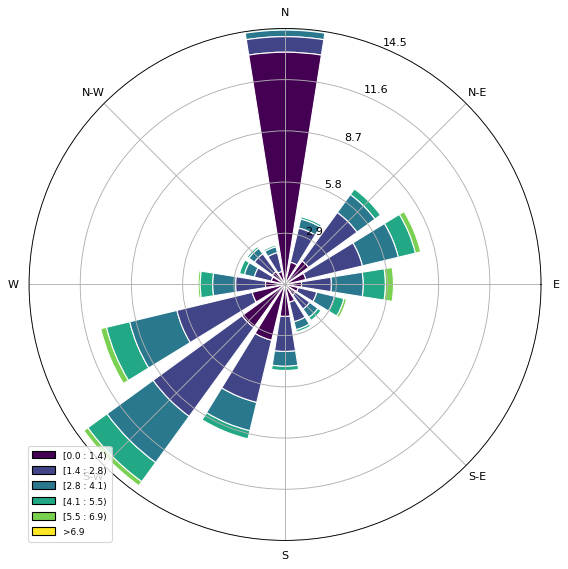

In [25]:
from windrose import WindroseAxes

# Wind Rose plot for wind analysis

ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

In [26]:
# Export Cleaned Data:
df_clean.to_csv("../../data/benin_clean.csv", index=False)

### Time Series Analysis 

In [27]:
# Use pandas to load the dataset
import pandas as pd
df = pd.read_csv("../../data/benin_clean.csv")

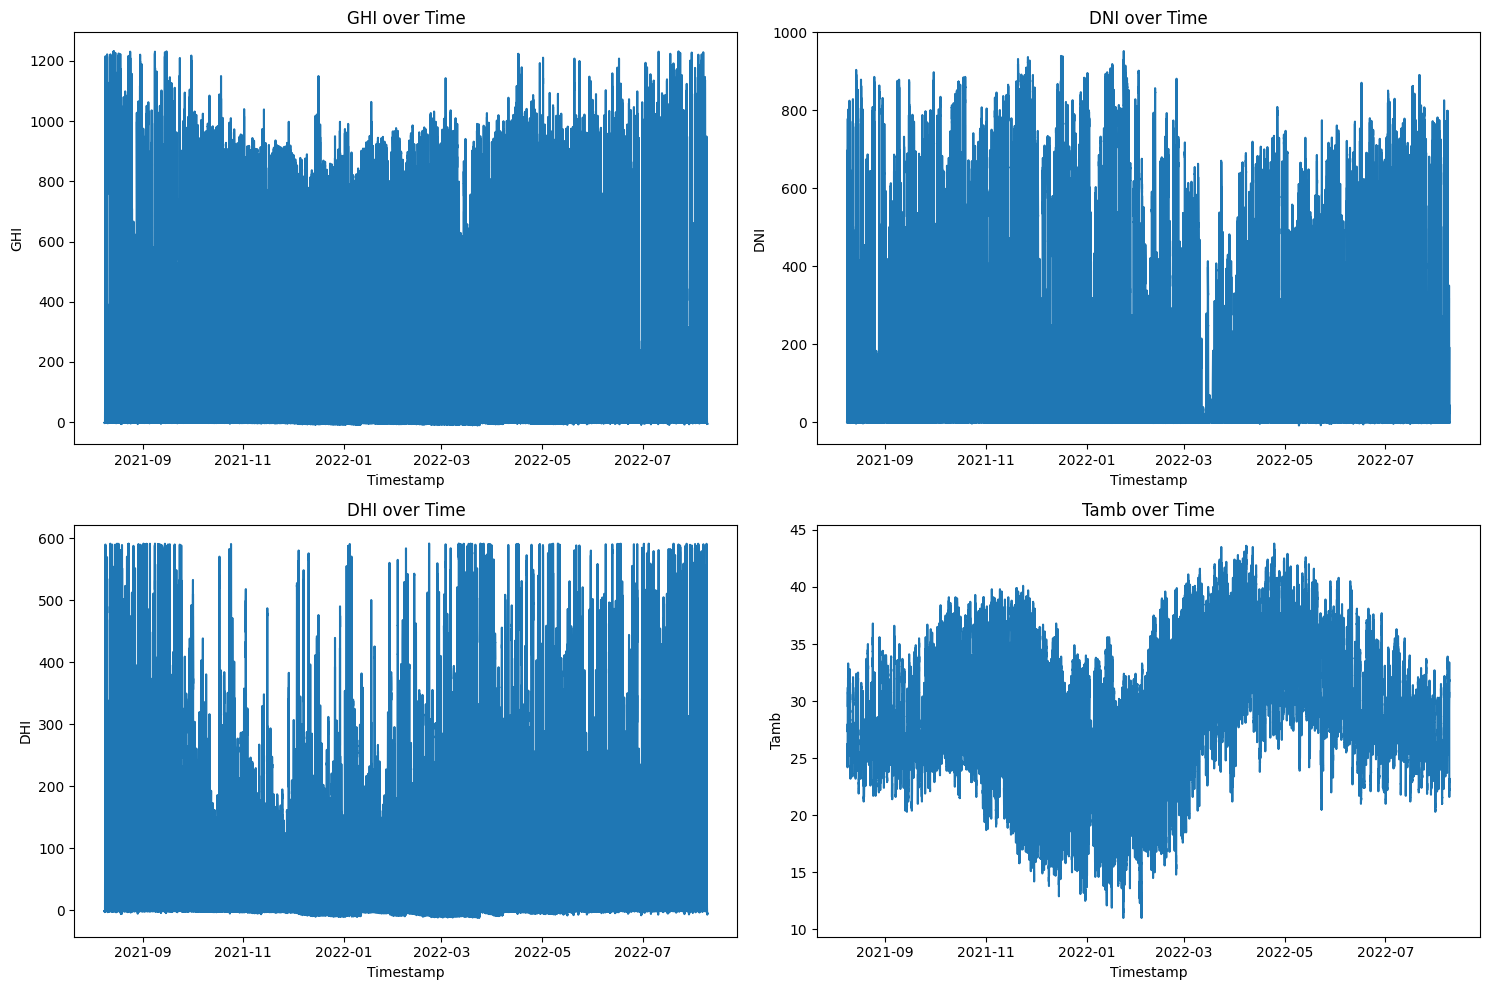

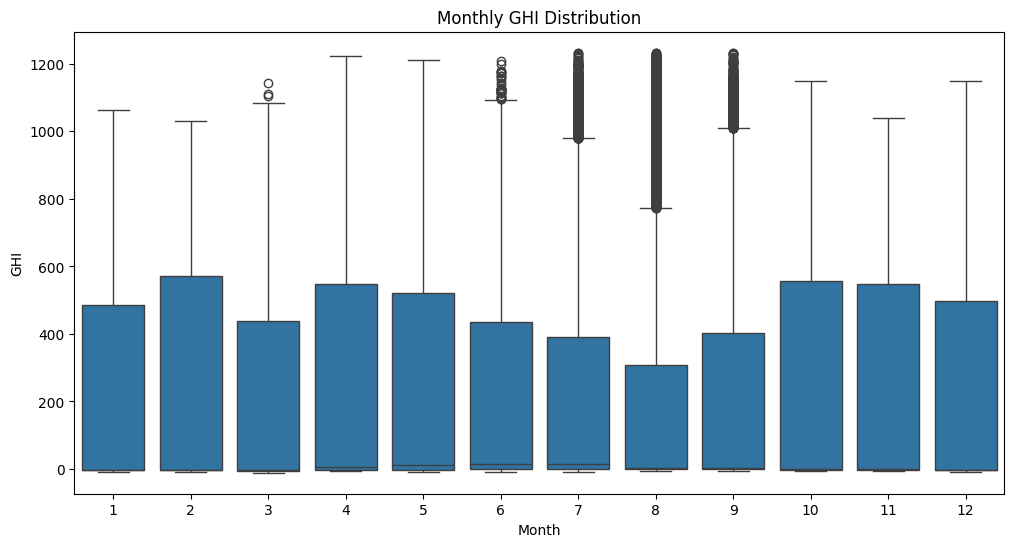

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Line plots for GHI, DNI, DHI, Tamb
plt.figure(figsize=(15, 10))
for i, col in enumerate(['GHI', 'DNI', 'DHI', 'Tamb'], 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=df, x='Timestamp', y=col)
    plt.title(f'{col} over Time')
plt.tight_layout()
plt.show()

# Monthly trends
df['Month'] = df['Timestamp'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='GHI')
plt.title('Monthly GHI Distribution')
plt.show()

 ### Cleaning Impact Analysis

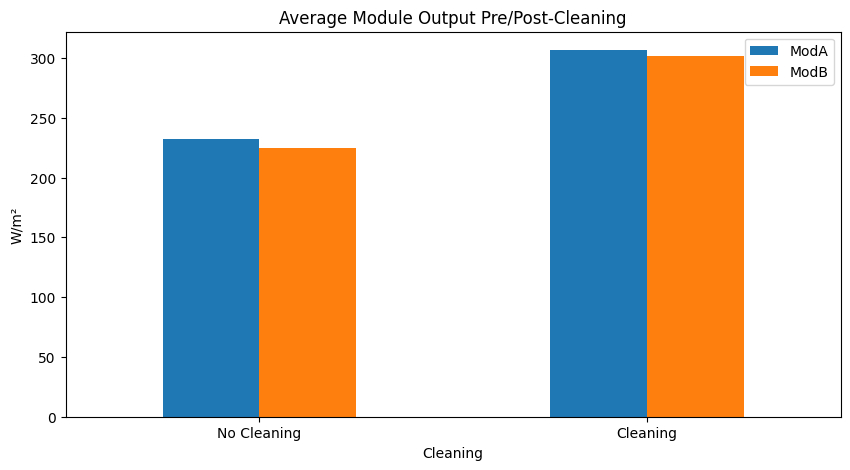

In [29]:
# Group by Cleaning flag
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Bar plot
cleaning_impact.plot(kind='bar', figsize=(10, 5))
plt.title('Average Module Output Pre/Post-Cleaning')
plt.ylabel('W/m²')
plt.xticks([0, 1], ['No Cleaning', 'Cleaning'], rotation=0)
plt.show()

### Correlation & Relationship Analysis 

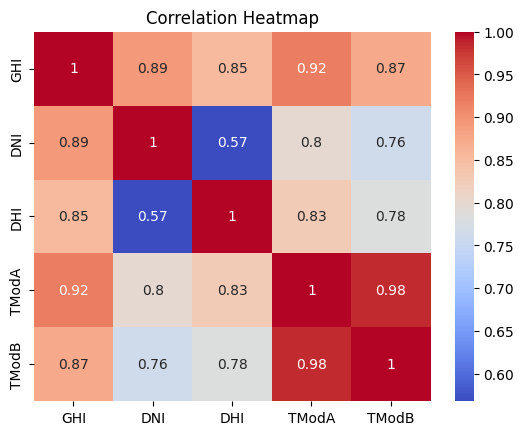

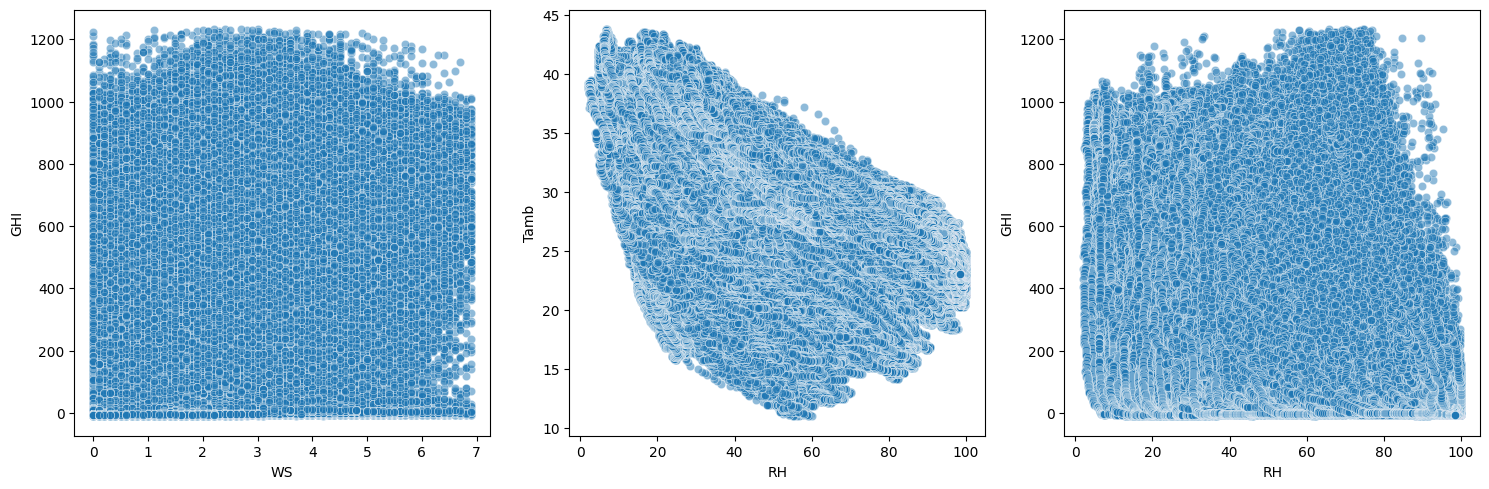

In [30]:
# Heatmap
corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate([('WS', 'GHI'), ('RH', 'Tamb'), ('RH', 'GHI')], 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=x, y=y, alpha=0.5)
plt.tight_layout()
plt.show()

### Wind & Distribution Analysis 

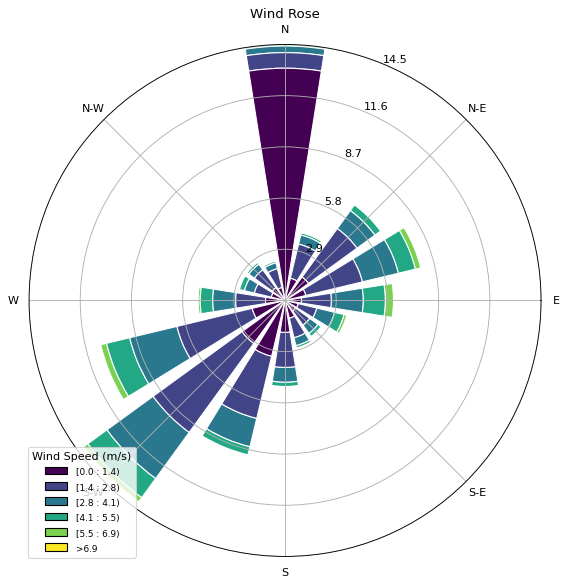

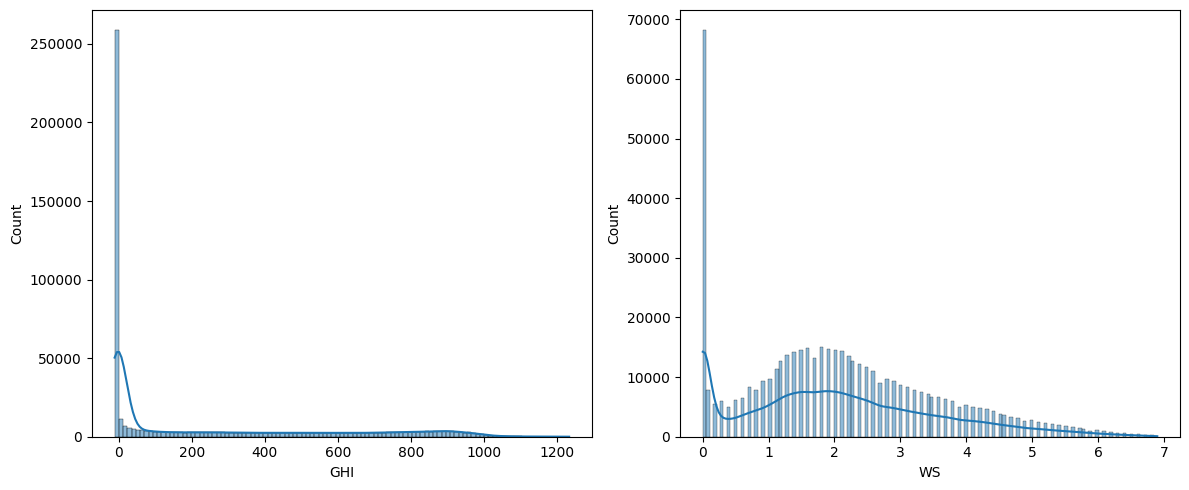

In [31]:
# Wind Rose (requires windrose library)
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose')
plt.show()

# Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['GHI'], kde=True)
plt.subplot(1, 2, 2)
sns.histplot(df['WS'], kde=True)
plt.tight_layout()
plt.show()

### Temperature Analysis

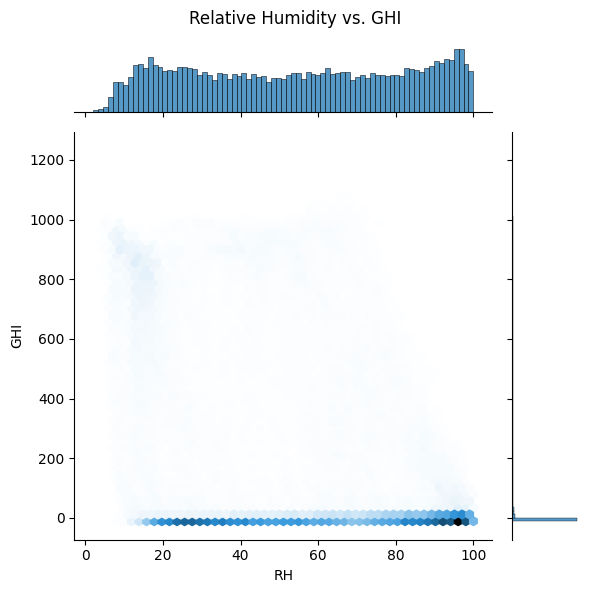

In [33]:
# RH vs. GHI
sns.jointplot(data=df, x='RH', y='GHI', kind='hex')
plt.suptitle('Relative Humidity vs. GHI')
plt.tight_layout()
plt.show()

### Bubble Chart

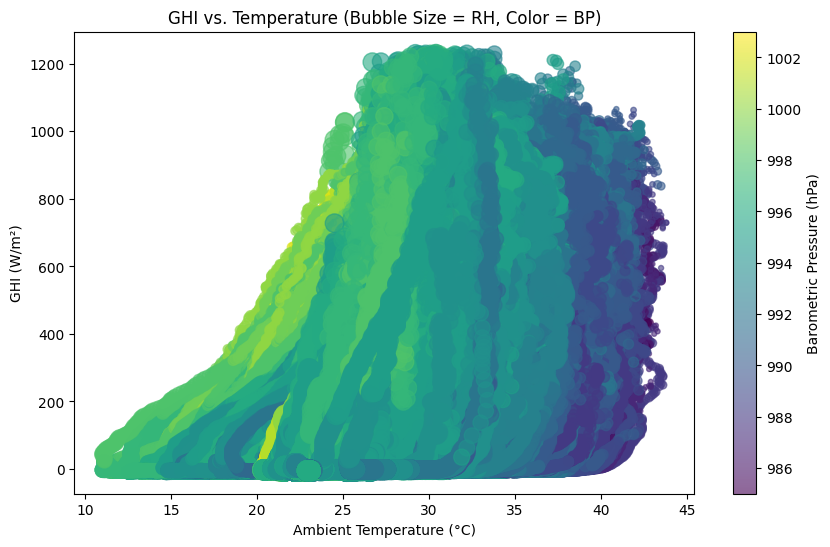

In [34]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=df['Tamb'], 
    y=df['GHI'], 
    s=df['RH']*2,  # Bubble size scaled by RH
    c=df['BP'],     # Color by BP
    alpha=0.6,
    cmap='viridis'
)
plt.colorbar(scatter, label='Barometric Pressure (hPa)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs. Temperature (Bubble Size = RH, Color = BP)')
plt.show()